In [20]:
import numpy as np
import qiskit
from qiskit.quantum_info import state_fidelity
from numpy import linalg as LA
import qib
import matplotlib.pyplot as plt
import scipy
import h5py

import sys
sys.path.append("../../src/brickwall_sparse")
from utils_sparse import construct_ising_local_term, reduce_list, X, I2, get_perms
from ansatz_sparse import ansatz_sparse
import rqcopt as oc
from scipy.sparse.linalg import expm_multiply
from qiskit.quantum_info import random_statevector
from scipy.linalg import expm
from itertools import product
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

J, h, g = (1, 0, 3)
Lx, Ly = (3, 3)
L = Lx*Ly
t = 0.125
# construct Hamiltonian
latt = qib.lattice.TriangularLattice((Lx, Ly), pbc=True)
field = qib.field.Field(qib.field.ParticleType.QUBIT, latt)
hamil = qib.IsingHamiltonian(field, J, h, g).as_matrix()

perms_1 = [[0, 1, 3, 4, 6, 7], [1, 2, 4, 5, 7, 8], [2, 0, 5, 3, 8, 6]]
perms_2 = [[0, 3, 1, 4, 2, 5], [3, 6, 4, 7, 5, 8], [6, 0, 7, 1, 8, 2]]
perms_3 = [[0, 4, 1, 5, 2, 3], [4, 8, 5, 6, 3, 7], [8, 0, 6, 1, 7, 2]]

eigenvalues, eigenvectors = scipy.sparse.linalg.eigsh(hamil, k=10, which='SA')
idx = eigenvalues.argsort()
eigenvalues_sort = eigenvalues[idx]
eigenvectors_sort = eigenvectors[:,idx]
ground_state = eigenvectors_sort[:, 0]


perms_extended = [perms_1]  + [perms_2] + [perms_3]

hloc1 = construct_ising_local_term(J, 0, 0, ndim=2)
hloc2 = g*(np.kron(X, I2)+np.kron(I2, X))/6
hloc = hloc1 + hloc2
V = scipy.linalg.expm(-1j*t*hloc)
Vlist_start = [V, V, V]

Current error:  0.18488044791482688
Current error:  0.17108672608265402
Current error:  0.14409918727182652
Current error:  0.09862307936412236
Current error:  0.0635299557725095
Current error:  0.06345740819799069
0.06345740819799069


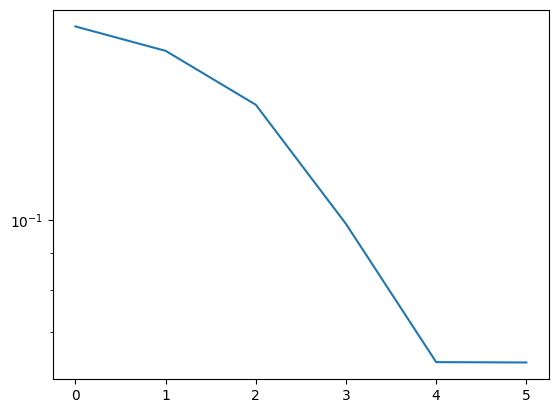

In [21]:
from optimize_sparse import optimize, err

Vlist, f_iter, err_iter = optimize(L, hamil, t, Vlist_start, perms_extended, rS=5, niter=5)
plt.plot(err_iter)
plt.yscale('log')
print(err_iter[-1])

In [23]:
"""
    Test operations.
"""
Lx, Ly = (3, 3)
L = Lx*Ly
perms_1 = [[0, 1, 3, 4, 6, 7], [1, 2, 4, 5, 7, 8], [2, 0, 5, 3, 8, 6]]
perms_2 = [[0, 3, 1, 4, 2, 5], [3, 6, 4, 7, 5, 8], [6, 0, 7, 1, 8, 2]]
perms_3 = [[0, 4, 1, 5, 2, 3], [4, 8, 5, 6, 3, 7], [8, 0, 6, 1, 7, 2]]
perms_extended = [perms_1]  + [perms_2] + [perms_3]

latt = qib.lattice.TriangularLattice((Lx, Ly), pbc=True)
field = qib.field.Field(qib.field.ParticleType.QUBIT, latt)
hamil = qib.IsingHamiltonian(field, J, h, g).as_matrix()


state = random_statevector(2**L).data
print('infidelity: ', 1-(state_fidelity(ansatz_sparse(Vlist, L, perms_extended, state), expm_multiply(
    -1j * t * hamil, state) )))

infidelity:  0.003915245147782409


In [22]:
"""
    Test operations.
"""
Lx, Ly = (4, 4)
L = Lx*Ly
perms_1 = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], [1, 2, 3, 0, 5, 6, 7, 4, 9, 10, 11, 8, 13, 14, 15, 12]]
perms_2 = [[0, 5, 10, 15, 3, 4, 9, 14, 2, 7, 8, 13, 1, 6, 11, 12], [5, 10, 15, 0, 4, 9, 14, 3, 7, 8, 13, 2, 6, 11, 12, 1]]
perms_3 = [[0, 4, 8, 12, 1, 5, 9, 13, 2, 6, 10, 14, 3, 7, 11, 15], [4, 8, 12, 0, 5, 9, 13, 1, 6, 10, 14, 2, 7, 11, 15, 3]]
perms_extended = [perms_1]  + [perms_2] + [perms_3]

latt = qib.lattice.TriangularLattice((Lx, Ly), pbc=True)
field = qib.field.Field(qib.field.ParticleType.QUBIT, latt)
hamil = qib.IsingHamiltonian(field, J, h, g).as_matrix()


state = random_statevector(2**L).data
print('infidelity: ', 1-(state_fidelity(ansatz_sparse(Vlist, L, perms_extended, state), expm_multiply(
    -1j * t * hamil, state) )))

infidelity:  0.008290225966516962
